<a href="https://colab.research.google.com/github/sejaltalwarr/sejaltalwar/blob/main/handwrittendigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Handwritten digit analysis**

**Objective**

The objective of a handwritten digit analysis project typically involves developing a machine learning model that can accurately classify and analyze handwritten digits. The specific objectives may include:

1. Classification: Building a model that can correctly identify and classify handwritten digits into their respective classes

2. Accuracy Improvement: Improving the accuracy of the model to achieve high performance in digit recognition.

3. Generalization: Creating a model that can generalize well and accurately classify digits that it has not encountered during training.

4. Robustness: Ensuring that the model can handle variations in handwriting styles, different writing instruments, and noise in the input data.

5. Real-Time Analysis: Optimizing the model for efficient inference to perform real-time analysis and recognition of handwritten digits.

The ultimate goal of the project is to create a reliable and accurate system that can analyze handwritten digits, enabling applications such as digit recognition, optical character recognition (OCR), digit-based data entry, and more.

**Importing libraries**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [73]:
import seaborn as sns

**Importing data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

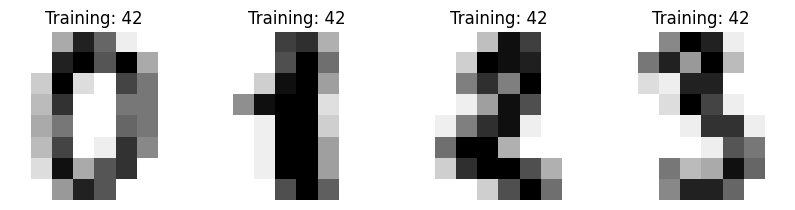

In [43]:
label=42
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, Tabel in zip(axes, df.images, df.target):
    ax. set_axis_off()
    ax. imshow(image, cmap=plt.cm.gray_r, interpolation = "nearest")
    ax.set_title("Training: %i" %label)


In [11]:
df.images.shape

(1797, 8, 8)

In [12]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
df.images[0].shape

(8, 8)

In [15]:
len(df.images)

1797

In [18]:
n_samples=len(df.images)
data=df.images.reshape((n_samples, -1))

In [19]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [20]:
data[0].shape

(64,)

In [21]:
data.shape

(1797, 64)

**Scaling image data**

In [23]:
data.min()


0.0

In [24]:
data.max()

16.0

In [25]:
data=data/16

In [27]:
data.min()

0.0

In [44]:
data.max()

1.0

In [45]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Train test split data**

In [48]:
from sklearn.model_selection import train_test_split


In [49]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)


In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest Classifier**

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf= RandomForestClassifier()

In [65]:
rf.fit(X_train, y_train)

RandomForestClassifier()

**Predict Test Data**

In [67]:
y_pred= rf.predict(X_test)

In [68]:
y_pred

array([3, 0, 3, 1, 5, 4, 5, 2, 3, 0, 5, 9, 1, 7, 9, 2, 1, 5, 5, 8, 6, 5,
       4, 6, 4, 3, 7, 8, 8, 1, 7, 4, 8, 9, 6, 9, 1, 9, 2, 9, 2, 2, 1, 6,
       1, 4, 2, 0, 5, 2, 7, 0, 7, 4, 9, 5, 3, 6, 2, 5, 4, 8, 7, 3, 2, 2,
       8, 2, 1, 4, 5, 3, 8, 1, 2, 2, 5, 7, 2, 1, 6, 6, 8, 1, 0, 7, 6, 2,
       7, 5, 5, 8, 5, 2, 9, 4, 8, 7, 2, 4, 3, 6, 3, 1, 4, 7, 4, 6, 1, 4,
       6, 3, 5, 0, 6, 4, 4, 8, 4, 3, 5, 0, 9, 9, 6, 8, 4, 0, 4, 1, 1, 8,
       6, 8, 3, 5, 8, 9, 3, 7, 7, 3, 6, 5, 5, 7, 4, 6, 4, 7, 1, 4, 3, 0,
       2, 1, 0, 7, 9, 0, 7, 1, 0, 0, 4, 9, 5, 6, 0, 9, 3, 5, 5, 6, 3, 6,
       9, 5, 9, 3, 4, 0, 5, 9, 4, 1, 8, 7, 0, 9, 5, 1, 6, 4, 3, 7, 1, 2,
       3, 4, 7, 4, 4, 3, 4, 6, 5, 0, 4, 9, 5, 8, 3, 8, 1, 1, 5, 0, 9, 5,
       1, 8, 5, 2, 6, 3, 1, 4, 2, 6, 5, 6, 0, 0, 2, 9, 1, 3, 5, 7, 5, 5,
       0, 5, 4, 8, 4, 3, 3, 7, 7, 7, 0, 8, 2, 9, 1, 3, 3, 1, 3, 4, 1, 8,
       6, 4, 8, 6, 8, 7, 6, 7, 4, 5, 2, 1, 1, 3, 8, 4, 5, 4, 6, 7, 8, 7,
       2, 9, 2, 9, 1, 9, 6, 9, 6, 3, 8, 6, 7, 0, 1,

**Model Accuracy**

In [69]:
from sklearn.metrics import confusion_matrix , classification_report

In [71]:
confusion_matrix(y_test, y_pred)

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 51,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 64,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  1,  0, 61,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 46,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2, 50,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 50]])

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        51
           3       0.98      0.94      0.96        54
           4       0.98      0.97      0.98        66
           5       1.00      0.97      0.98        63
           6       1.00      0.98      0.99        48
           7       0.88      0.98      0.93        47
           8       0.94      0.96      0.95        52
           9       0.98      0.98      0.98        51

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



**Data Visualisation**


In [74]:
data = {
    'Class': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Precision': [1.00, 1.00, 1.00, 0.98, 0.98, 1.00, 1.00, 0.88, 0.94, 0.98],
    'Recall': [1.00, 1.00, 1.00, 0.94, 0.97, 0.97, 0.98, 0.98, 0.96, 0.98],
    'F1-score': [1.00, 1.00, 1.00, 0.96, 0.98, 0.98, 0.99, 0.93, 0.95, 0.98]
}

In [75]:
daf = pd.DataFrame(data)

In [76]:
daf.set_index('Class', inplace=True)

<Axes: ylabel='Class'>

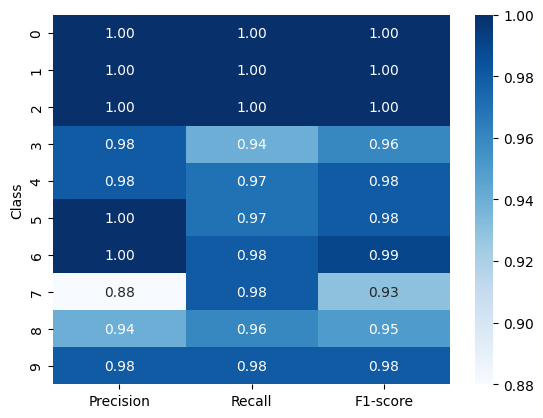

In [80]:
sns.heatmap(daf, annot=True, cmap='Blues', fmt='.2f')